['Very similar', 'Very similar', 'Very similar', 'Very similar', 'Very similar', 'Very similar', 'Very similar', 'Very similar', 'Very similar', 'Very similar']
['Partly similar', 'Very similar', 'Partly similar', 'Partly similar', 'Partly similar', 'Partly similar', 'Very similar', 'Dissimilar', 'Very similar', 'Partly similar']


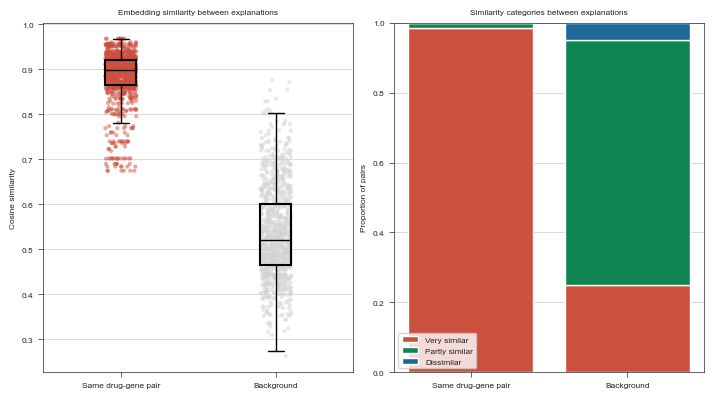

In [1]:
import os
import stylia
import csv
import seaborn as sns

fig, axs = stylia.create_figure(1, 2, width=stylia.TWO_COLUMNS_WIDTH, height=stylia.TWO_COLUMNS_WIDTH/1.8)

ax = axs.next()

x = []
with open(os.path.join("assets", "similarities.csv"), "r") as f:
    reader = csv.reader(f)
    for r in reader:
        x += [float(r[-1])]

x = x[:1000]

y = []
with open(os.path.join("assets", "random_similarities.csv"), "r") as f:
    reader = csv.reader(f)
    for r in reader:
        y += [float(r[-1])]

y = y[:1000]

# Combine data and create labels
data = x + y
labels = ["Same drug-gene pair"] * len(x) + ["Background"] * len(y)

# Create the swarmplot
sns.stripplot(x=labels, hue=labels, y=data, ax=ax, palette={"Same drug-gene pair": stylia.colors.colors.NamedColors().red, "Background": stylia.colors.colors.NamedColors().gray}, alpha=0.5, s=3)

sns.boxplot(
    x=labels, 
    y=data, 
    ax=ax, 
    width=0.2, 
    fliersize=0, 
    zorder=10000,
    boxprops=dict(
        facecolor='none',
        edgecolor='black',
        linewidth=1.5    
    ),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="black")
)

stylia.label(ax, title="Embedding similarity between explanations", xlabel="", ylabel="Cosine similarity")

ax = axs.next()
with open(os.path.join("assets", "similarity_categories.csv"), "r") as f:
    reader = csv.reader(f)
    x = [r[-1] for r in reader]

x = x[:1000]

with open(os.path.join("assets", "random_similarity_categories.csv"), "r") as f:
    reader = csv.reader(f)
    y = [r[-1] for r in reader]

y = y[:1000]

print(x[:10])
print(y[:10])

import pandas as pd
import matplotlib.pyplot as plt
# Categories in desired order (bottom to top)
categories = ['Very similar', 'Partly similar', 'Dissimilar']

# Compute normalized value counts (i.e., percentages)
x_counts = pd.Series(x).value_counts(normalize=True).reindex(categories).fillna(0)
y_counts = pd.Series(y).value_counts(normalize=True).reindex(categories).fillna(0)

# Stack into DataFrame
data = pd.DataFrame({'x': x_counts, 'y': y_counts})

colors = [stylia.colors.colors.NamedColors().red,
          stylia.colors.colors.NamedColors().green,
          stylia.colors.colors.NamedColors().blue]

bottom = [0, 0]  # Initial bottom for stacking
for i, cat in enumerate(categories):
    heights = data.loc[cat]
    ax.bar(['x', 'y'], heights, bottom=bottom, label=cat, color=colors[i])
    bottom = [b + h for b, h in zip(bottom, heights)]

ax.set_xticks(["x", "y"])
ax.set_xticklabels(["Same drug-gene pair", "Background"])

ax.set_ylabel("Proportion of pairs")
ax.set_xlabel("")
ax.set_title("Similarity categories between explanations")
ax.legend(loc="lower left")
ax.set_ylim(0, 1)

stylia.save_figure("assets/similarity_explanations.pdf")